## LIBRARIES AND PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## DATA 

In [3]:
def get_football_data():
    print("Downloading Premier League data...")
    season_urls = {
        '2022-23': 'https://www.football-data.co.uk/mmz4281/2223/E0.csv',
        '2023-24': 'https://www.football-data.co.uk/mmz4281/2324/E0.csv',
        '2024-25': 'https://www.football-data.co.uk/mmz4281/2425/E0.csv'
    }

    all_matches = []
    for season, url in season_urls.items():
        df = pd.read_csv(url)
        df["Season"] = season
        all_matches.append(df)

    match_data = pd.concat(all_matches, ignore_index=True)
    return match_data


data = get_football_data()
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data structure

In [4]:
data.shape

(1140, 133)

In [5]:
#columns
data.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       '1XBCH', '1XBCD', '1XBCA', 'BFECH', 'BFECD', 'BFECA', 'BFEC>2.5',
       'BFEC<2.5', 'BFECAHH', 'BFECAHA'],
      dtype='object', length=133)

### Data Description

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,1140.0,1.649123,1.359663,0.00,1.00,1.00,2.0000,9.00
FTAG,1140.0,1.372807,1.221895,0.00,0.00,1.00,2.0000,8.00
HTHG,1140.0,0.748246,0.875351,0.00,0.00,1.00,1.0000,5.00
HTAG,1140.0,0.600000,0.800351,0.00,0.00,0.00,1.0000,5.00
HS,1140.0,14.369298,5.867690,1.00,10.00,14.00,18.0000,36.00
...,...,...,...,...,...,...,...,...
BFECA,380.0,4.999921,4.652929,1.21,2.28,3.35,5.7000,32.00
BFEC>2.5,380.0,1.715789,0.246827,1.21,1.54,1.69,1.8600,2.66
BFEC<2.5,380.0,2.541737,0.557118,1.59,2.14,2.43,2.8250,5.50
BFECAHH,380.0,1.983079,0.088226,1.75,1.91,1.98,2.0525,2.21


In [7]:
#including categorical
data.describe(include='O')

,Div,Date,Time,HomeTeam,AwayTeam,FTR,HTR,Referee,Season
count,1140,1140,1140,1140,1140,1140,1140,1140,1140
unique,1,346,21,24,24,3,3,34,3
top,E0,25/05/2025,15:00,Crystal Palace,Arsenal,H,D,A Taylor,2022-23
freq,1140,10,406,57,57,514,434,87,380


### Duplicates

In [8]:
data.duplicated().sum()

0

**No duplicates on our dataset**

In [9]:
print(data.columns.tolist())

['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA', 'Season', 'BFH', 'BFD', 'BFA', '1XBH', '1XBD', '1XBA', 'BFEH', 'BFED', 'BFEA',

### Data Retention Decision

I will retain only the **match metadata**, **scoreline information**, and **performance statistics** because these variables describe the game itself without relying on betting market data. All other columns in the dataset are **bookmaker odds**, which pose two main problems for my goal of predicting the **2025–26 Premier League winner**:

#### 1. Data Leakage
- Odds are set just before each match and already incorporate knowledge about team strength, injuries, and other factors unavailable at the start of the season.  
- Using them would effectively feed my model the outcome probabilities determined by bookmakers, making predictions **unrealistically accurate** for past seasons but **unusable before future games**.

#### 2. Future Applicability
- For the 2025–26 season, **pre-match odds for every fixture** are not available in advance.  
- Relying on them would prevent me from making **early predicBy retaining only the **non-odds columns** — i.e., **goals, shots, fouls, cards**, and other **in-game statistics** — I ensure the model is built on genuine performance data.
rmance data.
on framework**.


In [10]:
columns_to_retain = [
    "Date", "Time", "HomeTeam", "AwayTeam", "Referee",
    "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR",
    "HS", "AS", "HST", "AST",
    "HF", "AF", "HC", "AC",
    "HY", "AY", "HR", "AR"
]

df = data[columns_to_retain]


In [11]:
df.shape

(1140, 23)

In [12]:
pd.set_option('display.max_rows', None)
missing_percent = df.isna().mean() * 100
print(missing_percent.sort_values(ascending=False))

Date        0.0
AS          0.0
HR          0.0
AY          0.0
HY          0.0
AC          0.0
HC          0.0
AF          0.0
HF          0.0
AST         0.0
HST         0.0
HS          0.0
Time        0.0
HTR         0.0
HTAG        0.0
HTHG        0.0
FTR         0.0
FTAG        0.0
FTHG        0.0
Referee     0.0
AwayTeam    0.0
HomeTeam    0.0
AR          0.0
dtype: float64


### Dataset Column Descriptions (Key Match Data)

- **Div**: League Division  
- **Date**: Match date (dd/mm/yy)  
- **Time**: Kick-off time  
- **HomeTeam / AwayTeam**: Teams playing  
- **Referee**: Match refe
ree  

- **FTHG / FTAG**: Full-time goals (home/away)  
- **FTR**: Full-time result (H=home win, D=draw, A=away win)  
- **HTHG / HTAG**: Half-time goals (home/away)  
- **HTR**: Half-time result
 (H/D/A)  

- **HS / AS**: Shots (home/away)  
- **HST / AST**: Shots on target (home/away)  
- **HF / AF**: Fouls committed (home/away)  
- **HC / AC**: Corners (home/away)  
- **HY / AY**: Yellow cards (home/away)  
- **HR / AR**: Red cards (home/away)


In [13]:
df.head()

,Date,Time,HomeTeam,AwayTeam,Referee,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,A Taylor,0,2,A,0,1,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,A Madley,2,2,D,1,0,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,P Bankes,2,0,H,1,0,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,R Jones,2,1,H,1,1,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nott'm Forest,S Hooper,2,0,H,0,0,...,10,0,9,14,11,1,0,3,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1140 non-null   object
 1   Time      1140 non-null   object
 2   HomeTeam  1140 non-null   object
 3   AwayTeam  1140 non-null   object
 4   Referee   1140 non-null   object
 5   FTHG      1140 non-null   int64 
 6   FTAG      1140 non-null   int64 
 7   FTR       1140 non-null   object
 8   HTHG      1140 non-null   int64 
 9   HTAG      1140 non-null   int64 
 10  HTR       1140 non-null   object
 11  HS        1140 non-null   int64 
 12  AS        1140 non-null   int64 
 13  HST       1140 non-null   int64 
 14  AST       1140 non-null   int64 
 15  HF        1140 non-null   int64 
 16  AF        1140 non-null   int64 
 17  HC        1140 non-null   int64 
 18  AC        1140 non-null   int64 
 19  HY        1140 non-null   int64 
 20  AY        1140 non-null   int64 
 21  HR        1140

### Converting date and time to datetime data type

In [15]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M', errors='coerce')
df = df.drop(columns = ['Date', 'Time'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10256\1406131011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M', errors='coerce')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   HomeTeam  1140 non-null   object        
 1   AwayTeam  1140 non-null   object        
 2   Referee   1140 non-null   object        
 3   FTHG      1140 non-null   int64         
 4   FTAG      1140 non-null   int64         
 5   FTR       1140 non-null   object        
 6   HTHG      1140 non-null   int64         
 7   HTAG      1140 non-null   int64         
 8   HTR       1140 non-null   object        
 9   HS        1140 non-null   int64         
 10  AS        1140 non-null   int64         
 11  HST       1140 non-null   int64         
 12  AST       1140 non-null   int64         
 13  HF        1140 non-null   int64         
 14  AF        1140 non-null   int64         
 15  HC        1140 non-null   int64         
 16  AC        1140 non-null   int64         
 17  HY        1140

### Checking Unique Values in Each Column

In [17]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("*******************")

Column: HomeTeam
['Crystal Palace' 'Fulham' 'Bournemouth' 'Leeds' 'Newcastle' 'Tottenham'
 'Everton' 'Leicester' 'Man United' 'West Ham' 'Aston Villa' 'Arsenal'
 'Brighton' 'Man City' 'Southampton' 'Wolves' 'Brentford' "Nott'm Forest"
 'Chelsea' 'Liverpool' 'Burnley' 'Sheffield United' 'Luton' 'Ipswich']
*******************
Column: AwayTeam
['Arsenal' 'Liverpool' 'Aston Villa' 'Wolves' "Nott'm Forest"
 'Southampton' 'Chelsea' 'Brentford' 'Brighton' 'Man City' 'Everton'
 'Leicester' 'Newcastle' 'Bournemouth' 'Leeds' 'Fulham' 'Man United'
 'West Ham' 'Tottenham' 'Crystal Palace' 'Luton' 'Sheffield United'
 'Burnley' 'Ipswich']
*******************
Column: Referee
['A Taylor' 'A Madley' 'P Bankes' 'R Jones' 'S Hooper' 'A Marriner'
 'C Pawson' 'J Gillett' 'P Tierney' 'M Oliver' 'D England' 'G Scott'
 'D Coote' 'T Harrington' 'J Brooks' 'S Attwell' 'M Salisbury' 'T Bramall'
 'C Kavanagh' 'R Madley' 'D Bond' 'T Robinson' 'J Smith' 'S Barrott'
 'R Welch' 'S Allison' 'L Smith' 'S Singh' 'J Gill

### Removing white space on referee column

In [18]:
df['Referee'] = df['Referee'].str.strip()

# EDA 

### UNIVARIATE ANALYIS

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


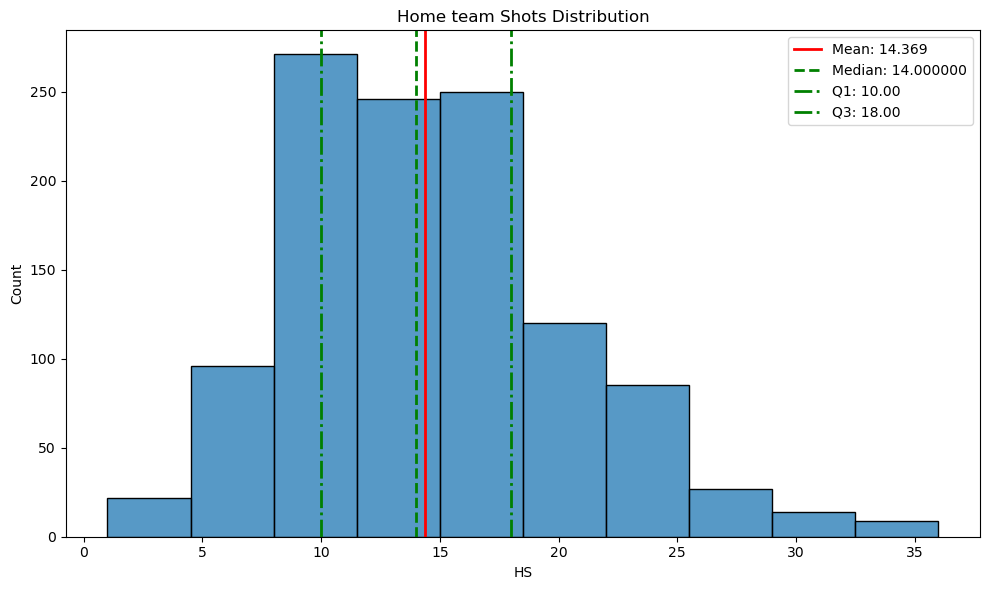

In [36]:
median_val = df['HS'].median()
mean_val = df['HS'].mean()
q1 = df['HS'].quantile(0.25)
q3 = df['HS'].quantile(0.75)

plt.figure(figsize=(10,6))
sns.histplot(df['HS'],bins=10,edgecolor="black")

#adding xvlines
plt.axvline(mean_val, color = 'red', linestyle='-', linewidth=2, label = f"Mean: {mean_val:.3f}")
plt.axvline(median_val, color = 'green', linestyle = '--',linewidth=2, label = f"Median: {median_val:3f}")
plt.axvline(q1, color = 'green', linestyle = '-.', linewidth=2, label= f"Q1: {q1:.2f}")
plt.axvline(q3, color = 'green', linestyle = '-.', linewidth=2, label= f"Q3: {q3:.2f}")
plt.title("Home team Shots Distribution")
plt.xlabel("HS")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show();

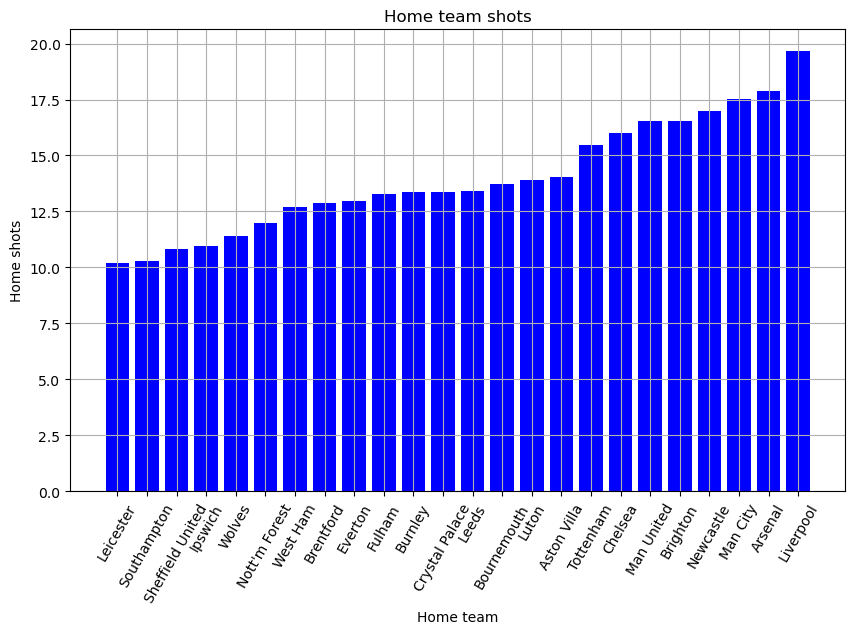

In [19]:
avg_home_shots = df.groupby('HomeTeam')['HS'].mean().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.bar(avg_home_shots.index, avg_home_shots.values, color='blue')
plt.title('Home team shots')
plt.xlabel('Home team')
plt.xticks(rotation=60)
plt.ylabel('Home shots')
plt.grid(True)
plt.show();

**From the average home shots, we can observe that the winners of the last three seasons `Man City(x2)` and `Liverpool(x1)` are the ones leading with shots while `Arsenal` who have been second through the three campaigns also second in total average home shots.**

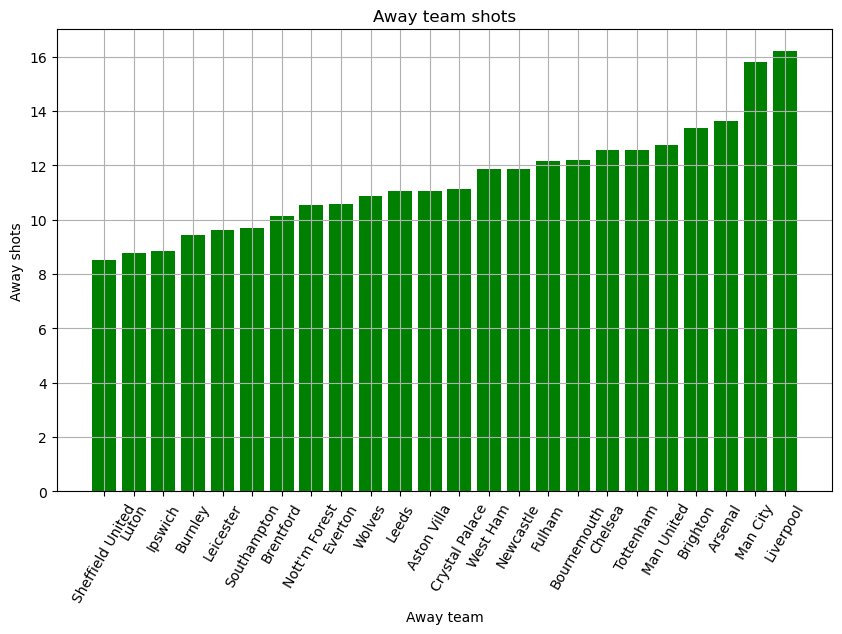

In [20]:
avg_away_shots = df.groupby('AwayTeam')['AS'].mean().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.bar(avg_away_shots.index, avg_away_shots.values, color='green')
plt.title('Away team shots')
plt.xlabel('Away team')
plt.xticks(rotation=60)
plt.ylabel('Away shots')
plt.grid(True)
plt.show();

**Away team shots graph also follow the Home team shots trend whereby the leading team over the last three seasons are the ones on top i.e. `Liverpool`, `Man Cit`y and `Arsenal` having the highest average away shots during the campaign.
Worth noting is that teams which have been relegated over the last three campaigns perform poorly in shots at home and away. These teams include `Sheffield United`, `Luton`, `Ipswich`, `Leicester` and `Southampton`. `Burnley` and `Luton` shows poor form away but its form at home is quite average.**

### BIVARIATE ANALYIS

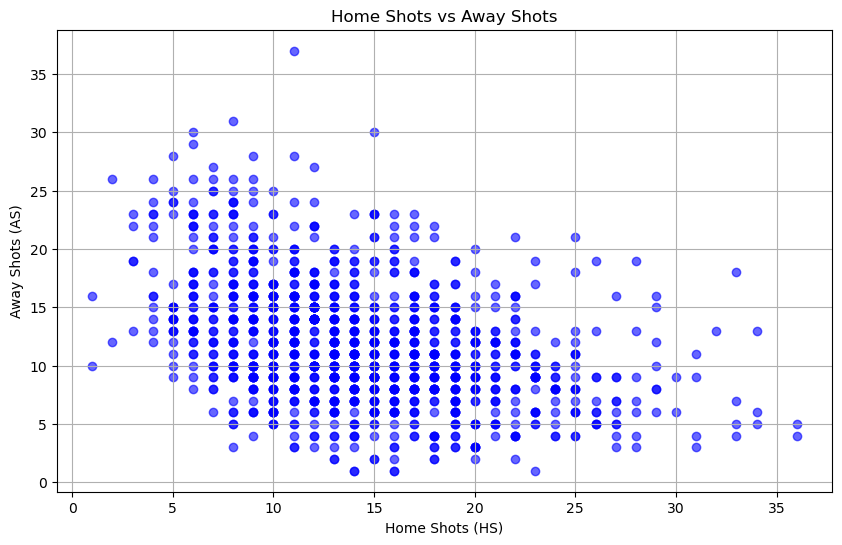

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df['HS'], df['AS'], color='blue', alpha=0.6)
plt.title('Home Shots vs Away Shots')
plt.xlabel('Home Shots (HS)')
plt.ylabel('Away Shots (AS)')
plt.grid(True)
plt.show()